In [1]:
# 2.4 Supervised Learning - Classification Models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import  roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%capture
%run "./03_feature_selection.ipynb"

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 237
Testing samples: 60


In [4]:
def evaluate_model(model):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict, average='macro')
    recall = recall_score(y_test, y_test_predict, average='macro')
    f1 = f1_score(y_test, y_test_predict, average='macro')
    
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Testing Accuracy:  {test_accuracy*100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

In [5]:

lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

evaluate_model(lrmodel)

Training Accuracy: 59.92%
Testing Accuracy:  58.33%
Precision: 0.1952
Recall:    0.2175
F1-score:  0.2051


In [6]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

evaluate_model(dtmodel)

Training Accuracy: 86.08%
Testing Accuracy:  56.67%
Precision: 0.2709
Recall:    0.2975
F1-score:  0.2788


In [7]:
# 3 - Random Forest model
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

evaluate_model(rfmodel)

Training Accuracy: 86.08%
Testing Accuracy:  63.33%
Precision: 0.3357
Recall:    0.3710
F1-score:  0.3497


In [8]:
# 4 - Support Vector Machine (SVM) model
svmmodel = SVC(probability=True)
svmmodel.fit(X_train,y_train)

evaluate_model(svmmodel)

Training Accuracy: 64.56%
Testing Accuracy:  65.00%
Precision: 0.3428
Recall:    0.2960
F1-score:  0.3054


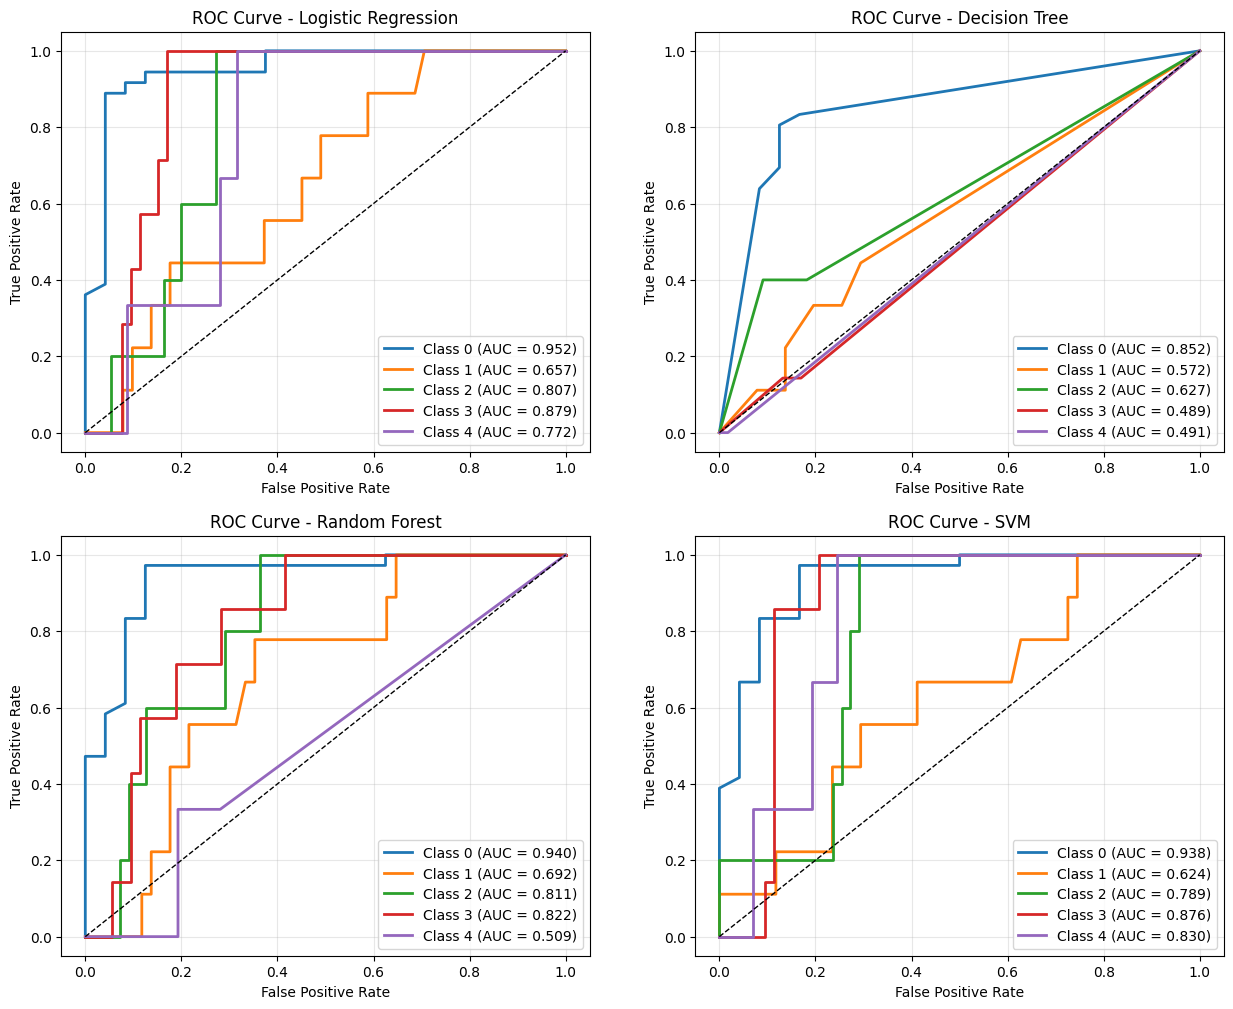

In [9]:
# Create 4 subplots - one for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Binarize the true labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

models = [
    ('Logistic Regression', lrmodel),
    ('Decision Tree', dtmodel),
    ('Random Forest', rfmodel),
    ('SVM', svmmodel)
]

for i, (model_name, model) in enumerate(models):
    ax = axes[i]
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)
    
    # Plot ROC curve for each class
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_prob[:, class_idx])
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr,label=f'Class {class_idx} (AUC = {roc_auc:.3f})', linewidth=2)
    
    # Add diagonal line
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)


plt.show()